## UMAP is a random algorithm, if we want to reproduce data, extral command is required.

In [1]:
import numpy as np
import sklearn.datasets
import umap
import umap.plot
from scipy.io import arff
import pandas as pd

mnist = arff.loadarff(f'mnist_784.arff')
# as read problem, data need to be processed.
data = np.array(pd.DataFrame(mnist[0]))[:,:-1]
labels = np.array(pd.DataFrame(mnist[0]).iloc[:,-1]).astype('i4')

CPU times: total: 19min 53s
Wall time: 1min 15s


<AxesSubplot:>

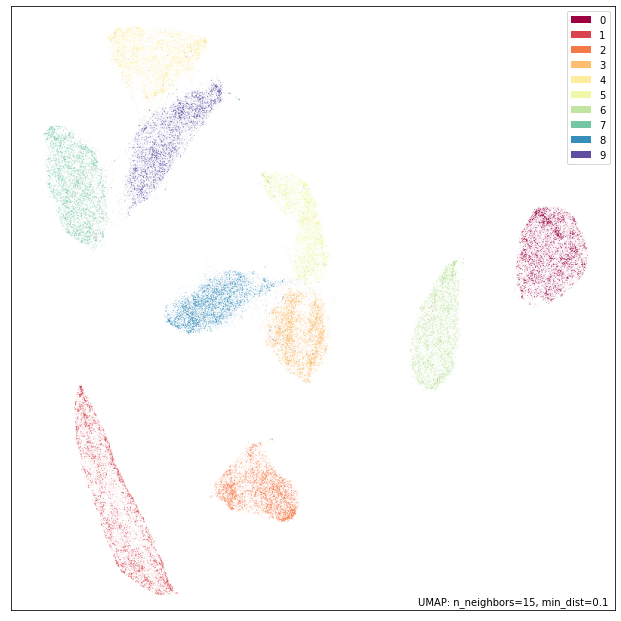

In [2]:
%%time 
# Above is a jupyter notebook magic, cannot be used directly in standard py script.
mapper1 = umap.UMAP().fit(data)
umap.plot.points(mapper1, labels=labels)

CPU Time is actually calculating time in CPU. Wall time is smaller because **multiple core** is used.

Second run will be faster, as compiling is already finished in background.

CPU times: total: 19min 7s
Wall time: 51.5 s


<AxesSubplot:>

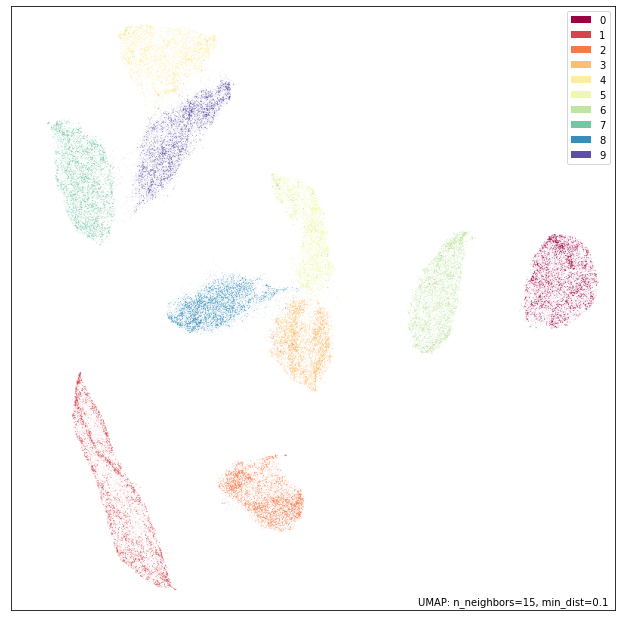

In [3]:
%%time
mapper2 = umap.UMAP().fit(data)
umap.plot.points(mapper2, labels=labels)

### Two run produce similar results generally, but the details are completely different. That's the Principle of UMAP algorithm. 
### If you want to reproduce result, specific define is required.

CPU times: total: 2min 18s
Wall time: 1min 22s


<AxesSubplot:>

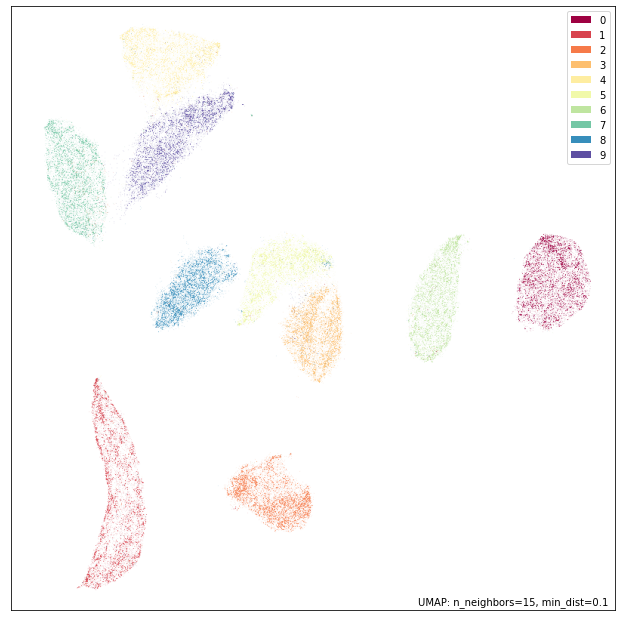

In [4]:
%%time
mapper3 = umap.UMAP(random_state=42).fit(data)
# Define a random state, we can generate reproducable results, but multi core will shut down if not rpeatable.
umap.plot.points(mapper3, labels=labels)

CPU times: total: 2min 20s
Wall time: 1min 24s


<AxesSubplot:>

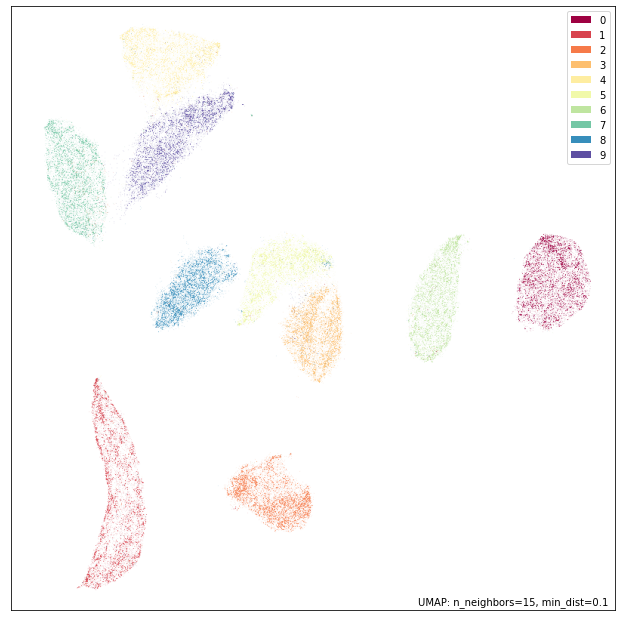

In [9]:
%%time
# But the result is repeatble now.
mapper4 = umap.UMAP(random_state=42).fit(data)
umap.plot.points(mapper4, labels=labels)

You can see point in mapper.embedding_ function.

In [10]:
print(f'Mapper embedding size = {mapper3.embedding_.shape}')
mapper3.embedding_

Mapper embedding size = (70000, 2)


array([[ 4.18702  ,  6.734082 ],
       [15.656595 ,  5.913598 ],
       [ 1.0351076, 14.695814 ],
       ...,
       [-1.7322125, 14.14676  ],
       [ 2.718629 ,  5.466282 ],
       [11.314385 ,  5.2830215]], dtype=float32)

In [16]:
# Acually each point in embedding space are exactly the same.
print(f'All points in mapper 3 and 4 are the same: {np.all(mapper3.embedding_ == mapper4.embedding_)}')
print(f'All points in mapper 1 and 4 are the same: {np.all(mapper1.embedding_ == mapper4.embedding_)}')

All points in mapper 3 and 4 are the same: True
All points in mapper 1 and 4 are the same: False
